### Librerias

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
from shapely.geometry import Point

<hr></hr>

### Carga de Datos

In [3]:
df = pd.read_csv('./iFlowDatos.csv')

Entendimiento del Dataset

In [4]:
df.head(3)

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000


In [5]:
# Vemos cuantos valores faltantes hay en cada columna
df.isna().sum()

iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                    41
longitud                   41
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

In [6]:
# Vemos cuantos valores únicos hay en cada columna
df.nunique()

iddomicilioorden            6593
direccion                   6072
localidad                     44
InicioHorario1                 3
FinHorario1                    3
latitud                     5887
longitud                    5891
cliente                        2
mes                            3
Bultos                      2391
Peso                        8027
Unidades                     377
InicioVisitaPlanificado     6797
FinVisitaPlanificado        6797
InicioVisitaReal           16357
FinVisitaReal              16309
dtype: int64

In [7]:
# Vemos el tamaño del dataset
df.shape

(27484, 16)

In [8]:
# Vemos con que tipo de dato fueron cargadas cada una de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27484 entries, 0 to 27483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iddomicilioorden         27484 non-null  int64  
 1   direccion                27484 non-null  object 
 2   localidad                27484 non-null  object 
 3   InicioHorario1           27484 non-null  int64  
 4   FinHorario1              27484 non-null  int64  
 5   latitud                  27443 non-null  float64
 6   longitud                 27443 non-null  float64
 7   cliente                  27484 non-null  int64  
 8   mes                      27484 non-null  int64  
 9   Bultos                   27484 non-null  float64
 10  Peso                     27484 non-null  float64
 11  Unidades                 27484 non-null  int64  
 12  InicioVisitaPlanificado  27484 non-null  object 
 13  FinVisitaPlanificado     27484 non-null  object 
 14  InicioVisitaReal      

Manejo de Datos Faltantes, Erroneos y Duplicados

El iddomicilioorden es el un identificador del domicilio de entrega, es decir, deberia tener únicamente una dirección, localidad, latitud y longitud específica.

Vamos a ver si existen domicilios que tienen más de una dirección, localidad, o coordenadas.

In [24]:
# Obtenemos un dataframe en el que se tiene todas las direcciones de las que existen sus coordenadas
iddomicilioorden_df = df[['iddomicilioorden','direccion','localidad','latitud','longitud']].dropna().drop_duplicates().reset_index(drop=True)

# Obtenemos los iddomicilioorden que tienen más de una dirección, localidad o coordenada. 
iddomicilioorden_duplicados = iddomicilioorden_df[iddomicilioorden_df.iddomicilioorden.duplicated()].iddomicilioorden.tolist()

# Obtenemos toda la información de los iddomicilioorden duplicados
iddomicilioorden_duplicated_df = iddomicilioorden_df[iddomicilioorden_df['iddomicilioorden'].isin(iddomicilioorden_duplicados)]
iddomicilioorden_duplicated_df.reset_index(drop=True)

,iddomicilioorden,direccion,localidad,latitud,longitud
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488
1,75571,PARANA 465,CAPITAL FEDERAL,-34.603996,-58.387488
2,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991
3,79502,AV SAN JUAN 3645,CAPITAL,-34.625230,-58.414991
4,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185
5,80956,AV. LIBERTADOR 3883 LOC 10,CAPITAL FEDERAL,-34.597605,-58.449185
6,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
7,81596,RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
8,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.583381,-58.433890
9,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.580419,-58.436290


In [25]:
# Con el fin de mantener una consistencia con las direcciones, vamos a tomar la primer direccion
# que aparezca en el dataset como la correcta.
# Vamos a reemplazar en aquellas filas con datos de direccion, coordenadas y localidad "incorrectos",
# con los datos de direccion, coordenadas y localidad "correctos".
iddomicilioorden_correct_df = iddomicilioorden_duplicated_df.drop_duplicates(subset=['iddomicilioorden']).reset_index(drop=True)
iddomicilioorden_correct_df

,iddomicilioorden,direccion,localidad,latitud,longitud
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488
1,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991
2,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185
3,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
4,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.583381,-58.433890
5,146201,AV. MONROE 1991,CAPITAL FEDERAL,-34.555979,-58.456187
6,148671,MERCEDES A DE ANCHORENA 477,SAN ISIDRO,-34.485321,-58.571307
7,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,0.000000,0.000000
8,164760,S. DE LA INDEPENDENCIA 985,CAPITAL FEDERAL,-34.566086,-58.436813
9,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,-34.463951,-58.612680


In [53]:
def fix_iddomicilioorden(row):
    iddomicilioorden= row['iddomicilioorden']
    direccion       = row['direccion']
    localidad       = row['localidad']
    latitud         = row['latitud']
    longitud        = row['longitud']
    iddomicilioorden_duplicados = iddomicilioorden_correct_df['iddomicilioorden'].unique().tolist()
    if iddomicilioorden in iddomicilioorden_duplicados:
        correct_data = iddomicilioorden_correct_df[iddomicilioorden_correct_df['iddomicilioorden']==iddomicilioorden]
        row['direccion'] = correct_data['direccion'].iloc[0]
        row['localidad'] = correct_data['localidad'].iloc[0]
        row['latitud']   = correct_data['latitud'].iloc[0]
        row['longitud']  = correct_data['longitud'].iloc[0]
    return row

In [54]:
df_1 = df.copy()
df_1 = df_1.apply(fix_iddomicilioorden, axis = 1)

# Se puede observar como se actualizaron los datos relacionados con la localización,
# pero los datos sobre la compra (cliente, mes, bultos, unidades, ...) no se modificaron.
df_1[df_1['iddomicilioorden'].isin(iddomicilioorden_correct_df.iddomicilioorden.tolist())]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
2084,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,5,11.000000,88.6000,11,2024-05-21 12:38:00.000,2024-05-21 12:38:00.000,2024-05-21 12:59:46.000,2024-05-21 13:00:46.000
2085,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,6,11.000000,123.1000,11,2024-06-18 12:08:00.000,2024-06-18 12:08:00.000,2024-06-18 16:23:00.000,2024-06-18 16:23:00.000
2086,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,7,11.000000,101.6000,11,2024-07-31 12:09:00.000,2024-07-31 12:09:00.000,2024-07-31 14:31:14.000,2024-07-31 14:34:13.000
2087,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,7,4.000000,35.9000,4,2024-07-10 13:04:00.000,2024-07-10 13:04:00.000,2024-07-10 16:40:36.000,2024-07-10 16:43:36.000
10104,79502,AV SAN JUAN 3521,CAPITAL,901,1401,-34.625230,-58.414991,70,5,2.925000,18.7200,55,2024-05-29 12:02:00.000,2024-05-29 12:02:00.000,2024-05-29 09:38:03.000,2024-05-29 09:38:33.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27392,182218,CALLE 63 Nº 6583,HUDSON,901,1401,-34.715689,-58.258277,20,7,10.000000,100.0000,10,2024-08-05 12:01:00.000,2024-08-05 12:01:00.000,2024-08-05 13:26:00.000,2024-08-05 13:26:00.000
27393,182218,CALLE 63 Nº 6583,HUDSON,901,1401,-34.715689,-58.258277,20,7,10.000000,100.0000,10,2024-08-05 12:01:00.000,2024-08-05 12:01:00.000,2024-08-05 13:26:00.000,2024-08-05 13:26:00.000
27413,182268,EVA PERON 2930,CAPITAL,901,1401,-34.642152,-58.458880,70,7,0.583334,2.5030,6,2024-07-30 12:18:00.000,2024-07-30 12:18:00.000,2024-07-30 16:06:00.000,2024-07-30 16:06:00.000
27414,182268,EVA PERON 2930,CAPITAL,901,1401,-34.642152,-58.458880,70,7,1.550000,2.9355,20,2024-07-26 12:35:00.000,2024-07-26 12:35:00.000,2024-07-26 17:12:44.017,2024-07-26 17:12:44.017


In [77]:
# Ahora filtramos aquellos domicilios en los que no se encuentra su latitud
iddomicilioorden_na = list(df_1[df_1['latitud'].isna()]['iddomicilioorden'])

In [83]:
# Creamos la siguiente funcion para ver si en aquellas direcciones en donde faltan sus latitudes,
# si dichas coordenadas existen en algun otro lado del dataframe, entonces estas seran asignadas
# a aquellas filas en donde faltan dichos valores
def fill_missing_coordinates(row):
    iddomicilioorden= row['iddomicilioorden']
    latitud         = row['latitud']
    longitud        = row['longitud']
    # Si el ID se encuentra en los ID sin coordenadas, pero dicho ID en otra fila si tiene coordenadas
    # entonces que copie las coordenadas en la fila que si estan y las pegue en la que no esta.
    if (iddomicilioorden in iddomicilioorden_na) and (iddomicilioorden in iddomicilioorden_df_2.iddomicilioorden.tolist()):
        if pd.isna(latitud): 
            row['latitud']  = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['latitud'])
        if pd.isna(longitud):
            row['longitud'] = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['longitud'])
    return row

# Recordemos que iddomicilioorden_df es un un dataframe en el que se tiene todas las direcciones de 
# las que existen sus coordenadas


In [103]:
df_2 = df_1.copy()
iddomicilioorden_df_2 = df_2[['iddomicilioorden','direccion','localidad','latitud','longitud']].dropna().drop_duplicates(subset=['iddomicilioorden']).reset_index(drop=True)
df_2 = df_2.apply(fill_missing_coordinates, axis=1)
print(df_1.isna().sum()[['latitud','longitud']])
print(df_2.isna().sum()[['latitud','longitud']])
# Se pudieron encontrar las coordenadas de 18 direcciones.

latitud     37
longitud    37
dtype: int64
latitud     19
longitud    19
dtype: int64


In [106]:
# Aquellas direcciones en las que no se pudieron obtener sus coordenadas, son 
# direcciones en las que no se tienen sus coordenadas en ningun lado del datafram
df_2[df_2['latitud'].isna()].head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,NaN,NaN,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,CAPITAL,901,1401,NaN,NaN,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000


In [158]:
# Podemos observar que hay direcciones que tienen como localidad "Sin Localidad",
# vamos a intentar encontrar la localidad que le corresponde.
# Observando la columna de localidad, podemos ver que hay muchas inconsistencias, desde
# distintas formas de expresar una misma ubicación, cómo tambien la falta de estandarización 
# de la ubicación: a veces se pone una localidad, otras un partido, otras el nombre de la
# provincia, etc.
df_2['localidad'].unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'SIN LOCALIDAD', 'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO',
       'FLORESTA', 'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [163]:
# Con el fin de mejorar la precisión de los datos de la columna localidad, utilizando la pagina
# del gobierno:
# https://datos.gob.ar/dataset/jgm-servicio-normalizacion-direcciones-unidades-territoriales-argentina/archivo/jgm_8.21
# Asignamos la localidad de cada dirección en base a sus coordenadas

# Cargamos el archivo GeoJSON de las localidades de Argentina
localidades_geojson = gpd.read_file("./limites-partidos/localidades.geojson")

# Convertimos las coordenadas a geometrías de puntos (Necesario para poder ver si el punto de coordenadas
# pertenece a algun poligono que representa alguna localidad)
geometry = [Point(xy) for xy in zip(df_2['longitud'], df_2['latitud'])]
df_puntos = gpd.GeoDataFrame(df_2, geometry=geometry)

# Nos aseguramos de que ambos GeoDataFrames estén en el mismo sistema de coordenadas (CRS)
df_puntos = df_puntos.set_crs(localidades_geojson.crs, allow_override=True)

# Hacemos un sjoin_nearest para asignar la localidad más cercana a cada punto
df_3 = gpd.sjoin_nearest(df_puntos, localidades_geojson, how="left")
df_3.head()

c:\Users\Marcos\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005.0,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005.0,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005.0,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005.0,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005.0,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [160]:
df_3.provincia.unique()

array(['{ "id": "02", "nombre": "Ciudad Autónoma de Buenos Aires" }',
       '{ "id": "06", "nombre": "Buenos Aires" }',
       '{ "id": "54", "nombre": "Misiones" }', nan,
       '{ "id": "50", "nombre": "Mendoza" }'], dtype=object)

In [164]:
mapeo = {
    '{ "id": "02", "nombre": "Ciudad Autónoma de Buenos Aires" }': "Ciudad Autónoma de Buenos Aires",
    '{ "id": "06", "nombre": "Buenos Aires" }': "Buenos Aires",
    '{ "id": "54", "nombre": "Misiones" }': "Misiones",
    '{ "id": "50", "nombre": "Mendoza" }': "Mendoza",
    np.nan: None
}
df_3['provincia'] = df_3['provincia'].map(mapeo)
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005.0,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005.0,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005.0,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005.0,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005.0,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [165]:
df_3['localidad'] = df_3['nombre']

df_3 = df_3[['iddomicilioorden',
                        'direccion',
                        'provincia',
                        'localidad',
                        'InicioHorario1',
                        'FinHorario1',
                        'latitud',
                        'longitud',
                        'cliente',
                        'mes',
                        'Bultos',
                        'Peso',
                        'Unidades',
                        'InicioVisitaPlanificado',
                        'FinVisitaPlanificado',
                        'InicioVisitaReal',
                        'FinVisitaReal',
                        ]].copy()
df_3.head()

,iddomicilioorden,direccion,provincia,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000


In [24]:
df_1[df_1['InicioVisitaPlanificado'] != df_1['FinVisitaPlanificado']]
# AMBAS COLUMNAS SON IGUALES, NO TIENEN DIFERENCIA ALGUNA

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates


In [25]:
# VER DISTRIBUCION DEL TIEMPO DE DIFERENCIA ENTRE InicioVisitaReal Y FinVisitaReal
# VER DISTRIBUCION DEL TIEMPO DE DIFERENCIA ENTRE InicioVisitaPlanificado Y InicioVisitaReal
# VER SI HAY ALGUNA CORRELACION ENTRE LA DEMORA Y LAS OTRAS VARIASBLES (YA SEA LOCALIDAD, DIRECCION, HORA)

In [26]:
localidades = df_1['localidad'].unique()#[6:10]
localidades

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO', 'FLORESTA',
       'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

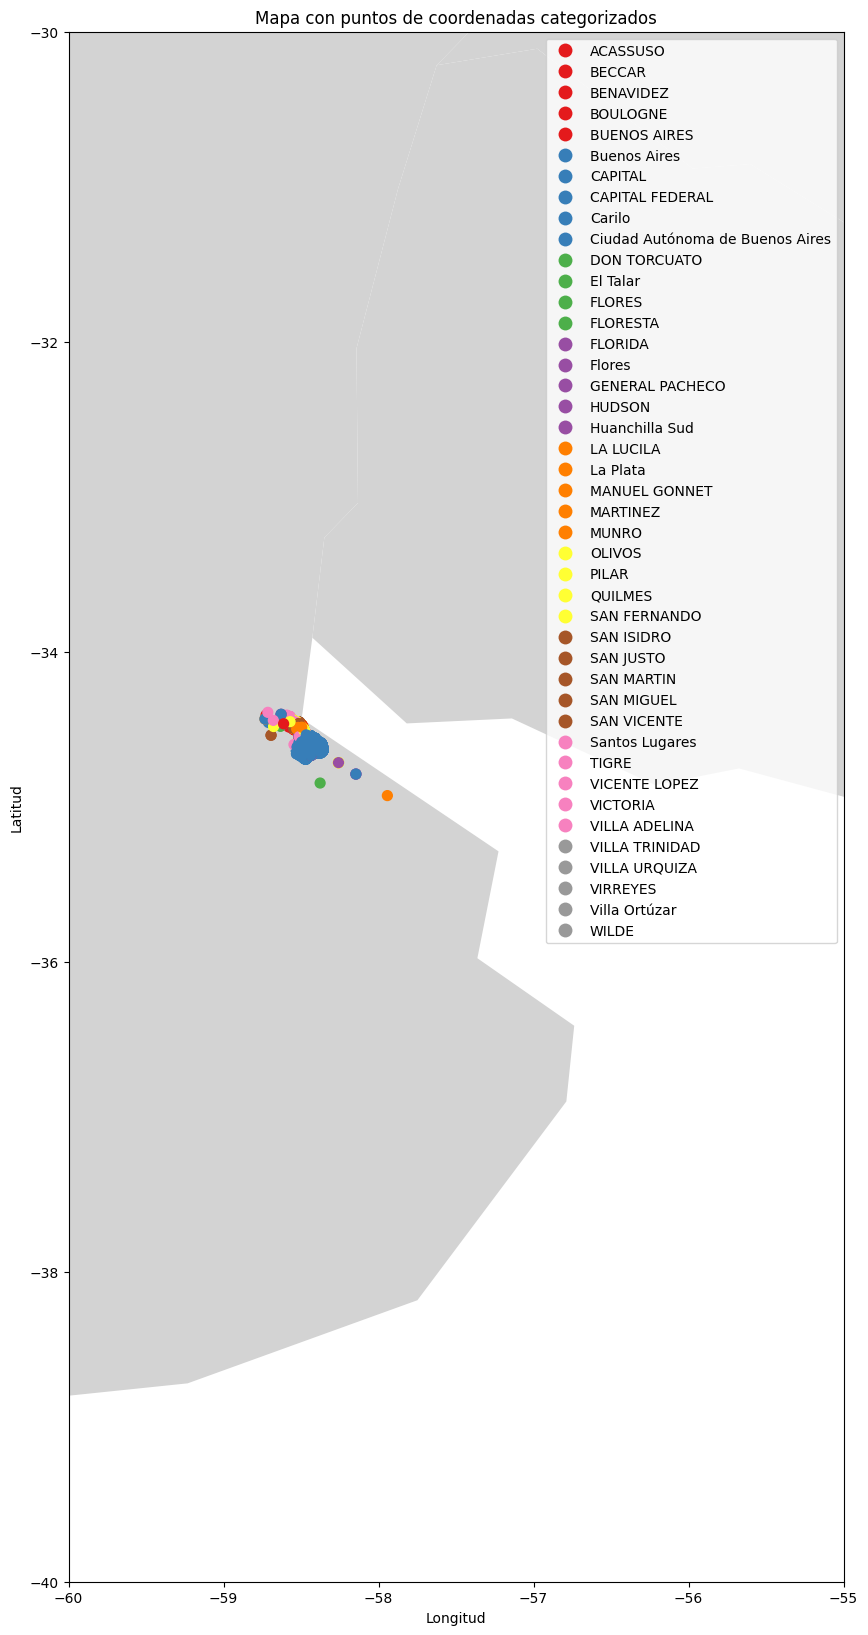

In [27]:


df_mapa = df_1[['localidad','latitud','longitud']].copy()
df_mapa = df_1[df_1['localidad'].isin(localidades)]
# Crear un DataFrame de ejemplo
# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Descargar un mapa base (opcional, pero recomendado para contexto geográfico)
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='localidad', legend=True, cmap='Set1', markersize=50)

# Limitar el área mostrada (ajustar según la región de interés)
# ax.set_xlim([df_mapa['longitud'].max(), df_mapa['longitud'].min()])  # Limitar el eje X (longitud) a la zona de Buenos Aires
# ax.set_ylim([df_mapa['latitud'].max(), df_mapa['latitud'].min()]) # Limitar el eje Y (latitud) a la zona de Buenos Aires
ax.set_xlim(-60,-55)  # Limitar el eje X (longitud) a la zona de Buenos Aires
ax.set_ylim(-40,-30)
# Mostrar el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [28]:
# parece que las localidades asignadas por coordenadas no estan tan bien puestos
# podemos usar KNN para tratar de estimar mejor las localidades en base a las que estan mas cerca
# todo depende 

In [29]:
df_1[df_1['localidad']=='BUENOS AIRES'].shape

(34, 17)

In [30]:
df_1[df_1['localidad']=='Buenos Aires'].shape

(12, 17)

In [31]:
df_1[df_1['localidad']=='Ciudad Autónoma de Buenos Aires'].shape

(8, 17)

In [32]:
df_1.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal,coordinates
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000,"(-34.56,-58.46)"
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,"(-34.56,-58.46)"
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000,"(-34.56,-58.46)"
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000,"(-34.56,-58.46)"
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,"(-34.56,-58.46)"


In [33]:
df_2 = df_1.copy()
df_2['VisitaPlanificado'] = df_2['InicioVisitaPlanificado']
df_2 = df_2.drop(columns=['InicioVisitaPlanificado','FinVisitaPlanificado']).copy()


df_2['VisitaPlanificadoFecha'] = pd.to_datetime(df_2['VisitaPlanificado']).dt.date
df_2['VisitaPlanificadoHora'] = pd.to_datetime(df_2['VisitaPlanificado']).dt.time
df_2['InicioVisitaFecha'] = pd.to_datetime(df_2['InicioVisitaReal']).dt.date
df_2['InicioVisitaHora'] = pd.to_datetime(df_2['InicioVisitaReal']).dt.time
df_2['FinVisitaFecha'] = pd.to_datetime(df_2['FinVisitaReal']).dt.date
df_2['FinVisitaHora'] = pd.to_datetime(df_2['FinVisitaReal']).dt.time

In [34]:
df_3 = df_2.drop(columns=['VisitaPlanificado'])
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,Unidades,InicioVisitaReal,FinVisitaReal,coordinates,VisitaPlanificadoFecha,VisitaPlanificadoHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,30,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000,"(-34.56,-58.46)",2024-05-23,12:06:00,2024-05-23,14:13:53,2024-05-23,14:14:53
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,38,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,"(-34.56,-58.46)",2024-05-10,12:05:00,2024-05-10,16:43:00,2024-05-10,16:43:00
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,32,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000,"(-34.56,-58.46)",2024-05-30,12:03:00,2024-05-30,09:41:36,2024-05-30,09:50:08
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,28,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000,"(-34.56,-58.46)",2024-06-13,12:14:00,2024-06-13,13:32:55,2024-06-13,13:39:55
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,31,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,"(-34.56,-58.46)",2024-06-27,12:27:00,2024-06-27,15:36:00,2024-06-27,15:36:00


In [35]:
df_3['FinVisitaReal']    = pd.to_datetime(df_3['FinVisitaReal'])#,    format='%H:%M:%S')
df_3['InicioVisitaReal'] = pd.to_datetime(df_3['InicioVisitaReal'])#, format='%H:%M:%S')
df_3['DemoraVisitaSegundos'] = (df_3['FinVisitaReal'] - df_3['InicioVisitaReal']).dt.total_seconds()#.astype(int)
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,InicioVisitaReal,FinVisitaReal,coordinates,VisitaPlanificadoFecha,VisitaPlanificadoHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora,DemoraVisitaSegundos
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,2024-05-23 14:13:53,2024-05-23 14:14:53,"(-34.56,-58.46)",2024-05-23,12:06:00,2024-05-23,14:13:53,2024-05-23,14:14:53,60.0
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,2024-05-10 16:43:00,2024-05-10 16:43:00,"(-34.56,-58.46)",2024-05-10,12:05:00,2024-05-10,16:43:00,2024-05-10,16:43:00,0.0
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,2024-05-30 09:41:36,2024-05-30 09:50:08,"(-34.56,-58.46)",2024-05-30,12:03:00,2024-05-30,09:41:36,2024-05-30,09:50:08,512.0
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,2024-06-13 13:32:55,2024-06-13 13:39:55,"(-34.56,-58.46)",2024-06-13,12:14:00,2024-06-13,13:32:55,2024-06-13,13:39:55,420.0
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,2024-06-27 15:36:00,2024-06-27 15:36:00,"(-34.56,-58.46)",2024-06-27,12:27:00,2024-06-27,15:36:00,2024-06-27,15:36:00,0.0


In [36]:
df_3.sort_values(by='DemoraVisitaSegundos', ascending = False)

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,InicioVisitaReal,FinVisitaReal,coordinates,VisitaPlanificadoFecha,VisitaPlanificadoHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora,DemoraVisitaSegundos
27219,180044,MALABIA 2385,CAPITAL FEDERAL,901,1401,-34.585446,-58.418688,20,6,154.000000,...,2024-06-24 09:24:06,2024-06-24 15:55:10,"(-34.59,-58.42)",2024-06-24,12:01:00,2024-06-24,09:24:06,2024-06-24,15:55:10,23464.0
1195,75258,SANN LUIS 2626,CAPITAL FEDERAL,901,1401,-34.600043,-58.403514,20,5,23.000000,...,2024-05-21 10:21:00,2024-05-21 16:40:19,"(-34.60,-58.40)",2024-05-21,12:53:00,2024-05-21,10:21:00,2024-05-21,16:40:19,22759.0
10188,79524,ALMAFUERTE 457,CAPITAL,901,1401,-34.643499,-58.413552,70,7,4.350000,...,2024-07-23 10:51:08,2024-07-23 15:50:45,"(-34.64,-58.41)",2024-07-23,12:21:00,2024-07-23,10:51:08,2024-07-23,15:50:45,17977.0
21407,128824,ALMAFUERTE 527,CAPITAL,901,1401,-34.643999,-58.413780,70,7,10.000000,...,2024-07-23 10:51:08,2024-07-23 15:50:45,"(-34.64,-58.41)",2024-07-23,12:20:00,2024-07-23,10:51:08,2024-07-23,15:50:45,17977.0
21408,128824,ALMAFUERTE 527,CAPITAL,901,1401,-34.643999,-58.413780,70,7,5.416667,...,2024-07-23 10:51:08,2024-07-23 15:50:45,"(-34.64,-58.41)",2024-07-23,12:20:00,2024-07-23,10:51:08,2024-07-23,15:50:45,17977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27091,179546,JUANA AZURDUY 3698,CAPITAL FEDERAL,901,1401,-34.557242,-58.478112,20,6,2.000000,...,NaT,NaT,"(-34.56,-58.48)",2024-06-10,12:02:00,NaT,NaT,NaT,NaT,NaN
27092,179546,JUANA AZURDUY 3698,CAPITAL FEDERAL,901,1401,-34.557242,-58.478112,20,6,1.000000,...,NaT,NaT,"(-34.56,-58.48)",2024-06-10,12:02:00,NaT,NaT,NaT,NaT,NaN
27135,179623,CALIFORNIA 2000,CAPITAL FEDERAL,901,1401,-34.647600,-58.376333,20,6,29.000000,...,NaT,NaT,"(-34.65,-58.38)",2024-06-12,13:24:00,NaT,NaT,NaT,NaT,NaN
27373,182178,PERGAMINO 3830,Flores,901,1401,-34.668499,-58.435005,20,7,4.000000,...,NaT,NaT,"(-34.67,-58.44)",2024-07-19,12:54:00,NaT,NaT,NaT,NaT,NaN


In [123]:
gdf_joined[gdf_joined['provincia'].isin(['Buenos Aires'])].tail(5)

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,FinVisitaReal,geometry,index_right,id,nombre,nombre_completo,provincia,fuente,categoria,centroide
27392,182218,CALLE 63 Nº 6583,HUDSON,901,1401,-34.715689,-58.258277,20,7,10.0,...,2024-08-05 13:26:00.000,POINT (-58.25828 -34.71569),125.0,060658,Quilmes,Municipio Quilmes,Buenos Aires,IGN,Municipio,"{ ""lon"": -58.276858020994197, ""lat"": -34.73497..."
27393,182218,CALLE 63 Nº 6583,HUDSON,901,1401,-34.715689,-58.258277,20,7,10.0,...,2024-08-05 13:26:00.000,POINT (-58.25828 -34.71569),125.0,060658,Quilmes,Municipio Quilmes,Buenos Aires,IGN,Municipio,"{ ""lon"": -58.276858020994197, ""lat"": -34.73497..."
27441,182595,TAPIALES 1187,VICENTE LOPEZ,901,1401,-34.442893,-58.678831,70,7,2.0,...,2024-07-26 11:24:00.000,POINT (-58.67883 -34.44289),1696.0,060805,Tigre,Municipio Tigre,Buenos Aires,IGN,Municipio,"{ ""lon"": -58.588173872574998, ""lat"": -34.38201..."
27455,182924,AV CORONEL ESCALADA 1200 LOC 5,BENAVIDEZ,901,1401,-34.464780,-58.612176,20,7,8.0,...,2024-07-29 13:23:18.000,POINT (-58.61218 -34.46478),1696.0,060805,Tigre,Municipio Tigre,Buenos Aires,IGN,Municipio,"{ ""lon"": -58.588173872574998, ""lat"": -34.38201..."
27469,183032,jose barros pasos 2938/3000,CAPITAL FEDERAL,901,1401,-34.789383,-58.145953,20,7,30.0,...,2024-08-06 16:57:00.000,POINT (-58.14595 -34.78938),41.0,060091,Berazategui,Municipio Berazategui,Buenos Aires,IGN,Municipio,"{ ""lon"": -58.155461508676296, ""lat"": -34.81824..."


In [38]:
df_3.localidad.unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO', 'FLORESTA',
       'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [39]:
gdf_joined[['localidad','fna']].drop_duplicates().head(20)

,localidad,fna
0,CAPITAL,Partido de Vicente López
15,CAPITAL,Partido de Tres de Febrero
15,CAPITAL,Partido de General San Martín
67,CAPITAL FEDERAL,Partido de La Matanza
100,CAPITAL FEDERAL,Partido de Tres de Febrero
100,CAPITAL FEDERAL,Partido de General San Martín
115,CAPITAL,Partido de La Matanza
209,VILLA URQUIZA,Partido de Vicente López
229,VILLA URQUIZA,Partido de General San Martín
352,FLORES,Partido de Lanús


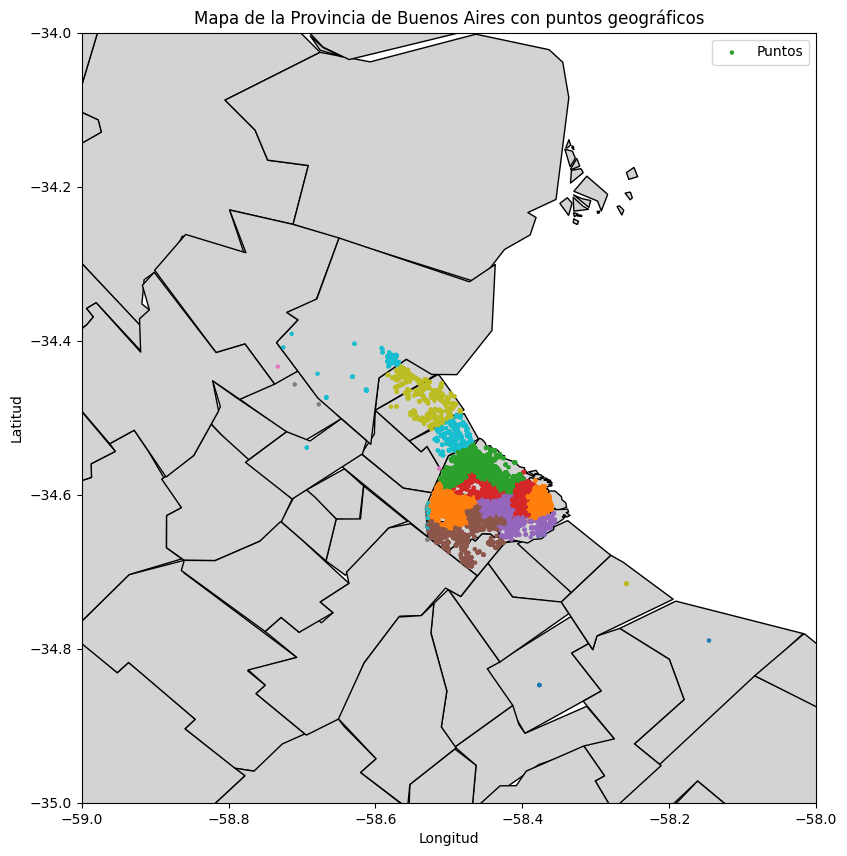

In [125]:
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los partidos de la provincia de Buenos Aires
partidos_geojson.plot(ax=ax, color='lightgray', edgecolor='black')

# Graficar los puntos (coordenadas) sobre los partidos
gdf_joined.plot(ax=ax, column='nombre', marker='o', markersize=5, label='Puntos')
# gdf_puntos[gdf_puntos['localidad'].isin(['CAPITAL','CAPITAL FEDERAL','BUENOS AIRES','Buenos Aires','Ciudad Autónoma de Buenos Aires'])].plot(ax=ax, column='localidad', marker='o', markersize=5, legend=True)
# gdf.plot(ax=ax, column='localidad', legend=True, cmap='Set1', markersize=50)

plt.xlim(-59,-58)
plt.ylim(-35,-34)
# Añadir etiquetas, leyenda y título
plt.legend()
plt.title('Mapa de la Provincia de Buenos Aires con puntos geográficos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()

In [65]:
df.localidad.unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'SIN LOCALIDAD', 'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO',
       'FLORESTA', 'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [52]:
gdf_joined.localidad.unique().tolist()

['CAPITAL',
 'CAPITAL FEDERAL',
 'VILLA URQUIZA',
 'FLORES',
 'Villa Ortúzar',
 'SAN FERNANDO',
 'VICTORIA',
 'BECCAR',
 'SAN ISIDRO',
 'TIGRE',
 'VIRREYES',
 'MARTINEZ',
 'BUENOS AIRES',
 'VICENTE LOPEZ',
 'OLIVOS',
 'FLORIDA',
 'MUNRO',
 'FLORESTA',
 'BOULOGNE',
 'ACASSUSO',
 'LA LUCILA',
 'VILLA TRINIDAD',
 'VILLA ADELINA',
 'BENAVIDEZ',
 'La Plata',
 'Huanchilla Sud',
 'GENERAL PACHECO',
 'El Talar',
 'Buenos Aires',
 'SAN MIGUEL',
 'QUILMES',
 'SAN MARTIN',
 'DON TORCUATO',
 'SAN JUSTO',
 'Carilo',
 'Ciudad Autónoma de Buenos Aires',
 'Santos Lugares',
 'MANUEL GONNET',
 'PILAR',
 'SAN VICENTE',
 'Flores',
 'HUDSON',
 'WILDE']

## TESTEO DE MAPA INTERACTIVO

In [47]:
import folium
from folium.plugins import HeatMap

In [54]:
df = df.dropna(subset=['latitud', 'longitud'])

# Agrupar por localidad y calcular la cantidad total de repartos y las coordenadas promedio
repartos_por_localidad = df.groupby('localidad').agg({
    'latitud': 'mean',
    'longitud': 'mean',
    'localidad': 'size'
}).rename(columns={'localidad': 'cantidad_repartos'}).reset_index()

# Crear el mapa centrado en Buenos Aires
m = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)

# Añadir un círculo por localidad con información de repartos
for i, row in repartos_por_localidad.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=np.log(row['cantidad_repartos']) * 5,  # Ajustar el tamaño del círculo
        popup=f"Localidad: {row['localidad']}<br>Cantidad de repartos: {row['cantidad_repartos']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Añadir un HeatMap basado en las coordenadas promedio de cada localidad
heat_data = [[row['latitud'], row['longitud'], row['cantidad_repartos']] for index, row in repartos_por_localidad.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save("heatmap_por_localidad_buenos_aires.html")

# Mostrar el mapa (si estás en Jupyter Notebook)
m